# Access Spitzer IRS spectra and metadata for targets

Retrieve **Spitzer IRS mid-infrared spectra** for the 113 ultracool dwarfs in [Suárez & Metchev (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.5701S/abstract), along with parameters from **Tables 1, 2, 4, and 5** in the paper, including:

- Spectral types
- Variability and binarity labels
- Observation log
- Publication reference
- Photometry
- Spectral indices


In [1]:
import seda


    SEDA v0.7.0 package imported


Read table with all targets and relevant information:

In [2]:
irs = seda.archival_data.IRS()
irs_table = irs.table
irs_table

Name,SName,OName,RAJ2000,DEJ2000,Discovery,SpTypeopt,r_SpTypeopt,SpTypeir,r_SpTypeir,spt_adop,spt_flt,Binary,Variable,Non-var,Program,AORKEY,Module,ExpTime,ObsDate,PI,SNR6um,SNR12um,Publication,CH4obs,e_CH4obs,r_CH4obs,W3obs,e_W3obs,CH4syn,e_CH4syn,W3syn,e_W3syn,Water,e_Water,Methane,e_Methane,Ammonia,e_Ammonia,Silicate,e_Silicate,Inclination,ed_Inclination,eu_Inclination,Inc_ref,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,CH1,eCH1,CH2,eCH2,CH3,eCH3,CH4,eCH4,IRAC_Ref,Period,ePeriod,Period_ref,AJ(%),e_AJ,A3.6(%),e_A3.6,A4.5(%),e_A4.5,ref,parallax,eparallax,parallax_ref,SpeX,Silicate_SM23,e_Silicate_SM23,excess_Si_SM23,e_excess_Si_SM23
str23,str9,str22,float64,float64,str7,str7,str7,str7,str7,str7,float64,str7,str7,str6,int64,str35,str15,str15,str32,str18,int64,int64,str13,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,str25,float64,float64,float64,float64,float64,float64,str15,float64,float64,str21,str3,float64,float64,float64,float64
2MASSJ00001354+2554180,0000+2554,--,0.0563,25.9055,Knap04,T5,Pine16,T4.5,Burg06b,T4.5,94.5,--,--,Buen14,20514,"14796032,14796288","SL2,SL1","144,200,0,0","2005-12-18,2006-01-25","Golimowski,DavidA.",15,11,Step09,12.5,0.03,Legg07,--,--,12.95,0.073,--,--,1.44,0.12,2.92,0.25,1.24,0.05,0.72,0.14,--,--,--,--,15.063,0.041,14.731,0.074,14.836,0.12,14.328,0.036,13.881,0.067,10.662,0.15,8.738,--,13.72,0.03,13.07,0.04,12.56,0.1,12.5,0.03,Leggett_etal2007,--,--,--,--,--,--,--,--,--,Vos+2020_table3,70.8,1.9,Dupuy-Liu2012,yes,0.41,0.05,-0.12,0.05
2MASSJ00043484-4044058,0004-4044,"GJ1001BC,LHS102BC",1.1453,-40.7351,EROS99,L5,Kirk01,L4.5,Knap04,L5,85.0,Goli04,--,Diet14,50367,26090752,"SL2,SL1","2,3,0,0",2009-01-15,"Cushing,MichaelC.",14,4,Suar22,10.13,0.02,Patt06,9.803,0.048,10.414,0.136,--,--,1.12,0.02,0.67,0.05,1.05,0.07,1.15,0.21,--,--,--,--,13.109,0.024,12.055,0.026,11.396,0.026,10.751,0.023,10.488,0.02,9.868,0.045,9.089,--,10.36,0.01,10.47,0.01,10.14,0.03,10.13,0.02,Patten_etal2006,--,--,--,--,--,--,--,--,--,Vos+2020_table3,82.35,0.26,GaiaCollaboration2020,yes,1.36,0.11,0.25,0.11
2MASSJ00242463-0158201,0024-0158,"DYPsc,BRI0021-0214",6.1026,-1.9722,Irwi91,M9.5,Kirk95,M9.5,Geba02,M9.5,79.5,--,Mart01,--,29,3877632,"SL2,SL1,LL2","2,4,36,0",2004-01-04,"Houck,JamesR.",26,9,Cush06,9.55,0.01,Patt06,9.388,0.039,9.531,0.059,9.393,0.112,1.03,0.01,0.67,0.01,1.1,0.02,1.01,0.04,--,--,--,--,11.992,0.035,11.084,0.022,10.539,0.023,10.166,0.024,9.9,0.019,9.412,0.039,8.797,--,9.94,0.03,9.91,0.03,9.72,0.01,9.55,0.01,Patten_etal2006,12.0,--,Martin_etal2001,--,--,--,--,--,--,Vos+2020_table3,80.34,0.19,GaiaCollaboration2020,no,0.94,0.04,-0.01,0.04
2MASSJ00250365+4759191,0025+4759,--,6.2654,47.9886,Cruz07,L4,Cruz07,--,--,L4,84.0,Reid06,--,--,50367,26090496,"SL2,SL1","16,30,0,0",2009-03-07,"Cushing,MichaelC.",20,7,"Fili15,Suar22",--,--,--,11.364,0.121,11.459,0.089,--,--,1.07,0.01,0.63,0.03,1.03,0.05,1.35,0.1,--,--,--,--,14.84,0.038,13.667,0.031,12.902,0.057,11.74,0.021,11.572,0.02,11.215,0.085,9.552,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,Vos+2020_table3,18.49,0.06,GaiaCollaboration2020,no,1.09,0.07,-0.06,0.07
ULASJ003402.77-005206.7,0034-0052,--,8.5116,-0.869,Warr07,--,--,T9,Burn08,T9,99.0,--,--,--,40419,"21830400,21830656",SL1,"0,512,0,0",2008-01-15,"Leggett,SandyK.",0,9,Legg09,13.91,0.06,Warr07,11.955,--,--,--,--,--,--,--,4.59,0.48,1.63,0.18,--,--,--,--,--,--,16.359,0.085,16.04,0.134,16.024,--,17.471,0.29,14.5,0.079,12.058,--,8.676,--,16.28,0.03,14.49,0.03,14.82,0.05,13.91,0.06,Warren_etal2007,--,--,--,--,--,--,--,--,--,Vos+2020_table3,68.7,1.4,Dupuy-Liu2012,no,--,--,--,--
2MASSJ00345157+0523050,0034+0523,--,8.7144,5.3846,Burg04b,--,--,T6.5,Burg06b,T6.5,96.5,--,--

In [3]:
# all table columns
irs_table.columns

<TableColumns names=('Name','SName','OName','RAJ2000','DEJ2000','Discovery','SpTypeopt','r_SpTypeopt','SpTypeir','r_SpTypeir','spt_adop','spt_flt','Binary','Variable','Non-var','Program','AORKEY','Module','ExpTime','ObsDate','PI','SNR6um','SNR12um','Publication','CH4obs','e_CH4obs','r_CH4obs','W3obs','e_W3obs','CH4syn','e_CH4syn','W3syn','e_W3syn','Water','e_Water','Methane','e_Methane','Ammonia','e_Ammonia','Silicate','e_Silicate','Inclination','ed_Inclination','eu_Inclination','Inc_ref','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','W1mag','e_W1mag','W2mag','e_W2mag','W3mag','e_W3mag','W4mag','e_W4mag','CH1','eCH1','CH2','eCH2','CH3','eCH3','CH4','eCH4','IRAC_Ref','Period','ePeriod','Period_ref','AJ(%)','e_AJ','A3.6(%)','e_A3.6','A4.5(%)','e_A4.5','ref','parallax','eparallax','parallax_ref','SpeX','Silicate_SM23','e_Silicate_SM23','excess_Si_SM23','e_excess_Si_SM23')>

List all targets with Spitzer IRS spectra:

In [4]:
irs_table['SName'].data # short name

array(['0000+2554', '0004-4044', '0024-0158', '0025+4759', '0034-0052',
       '0034+0523', '0036+1821', '0059-0114', '0136+0933', '0139-1757',
       '0144-0716', '0251-0352', '0255-4700', '0355+1133', '0415-0935',
       '0423-0414', '0429-3123', '0439-2353', '0445-3048', '0501-0010',
       '0523-1403', '0532+8246', '0539-0059', '0559-1404', '0624-4521',
       '0700+3157', '0727+1710', '0746+2000', '0758+3247', '0805+4812',
       '0825+2115', '0829+2646', '0830+4828', '0837-0000', '0857+5708',
       '0908+5032', '0911+7401', '0912+1459', '0920+3517', '0921-2104',
       '0929+3429', '0937+2931', '0939-2448', '1013-1356', '1017+1308',
       '1021-0304', '1022+5825', '1028+5654', '1036-3441', '1045-0149',
       '1048+0111', '1051+5613', '1052+4422', '1106+2754', '1108+6830',
       '1110+0116', '1112+3548', '1114-2618', '1126-5003', '1155+0559',
       '1207+0244', '1213-0432', '1217-0311', '1225-2739', '1237+6526',
       '1239+5515', '1254-0122', '1305-2541', '1331-0116', '1335

**Read the spectrum for a few targets:**

In [5]:
targets = ['0355+1133', '0136+0933', '2204-5646']
spectra = irs.get_spectra(targets)

Quick plot of the spectra

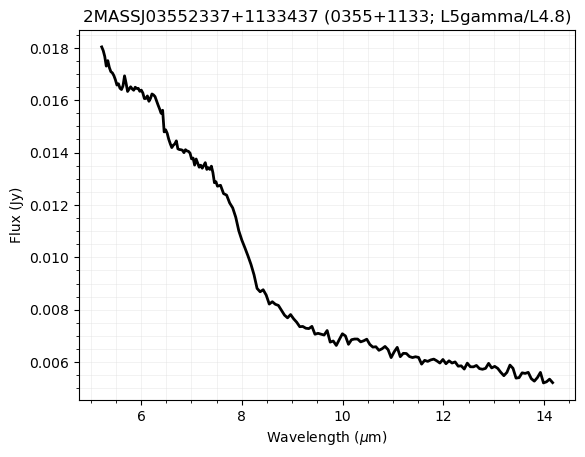

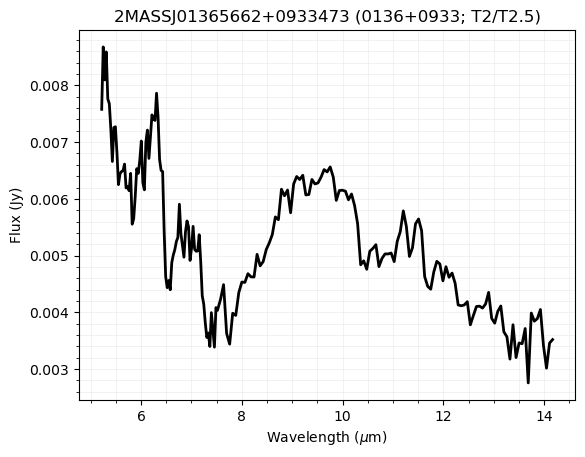

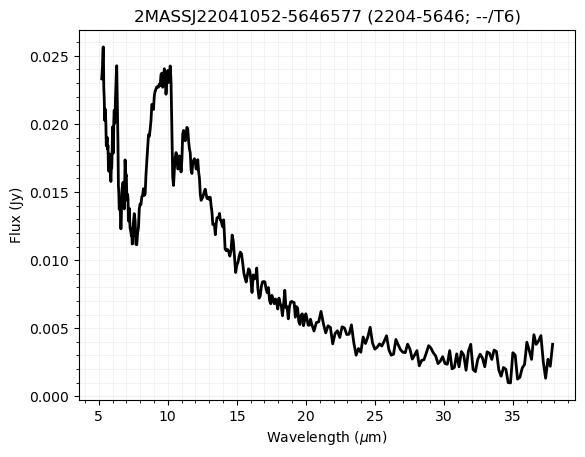

In [6]:
for s in spectra:
    # pass extra plotting options to customize the spectrum line appearance
    fig, ax = s.plot(color='black', linewidth=2)

The plot can be further customized, for example for the first spectrum:

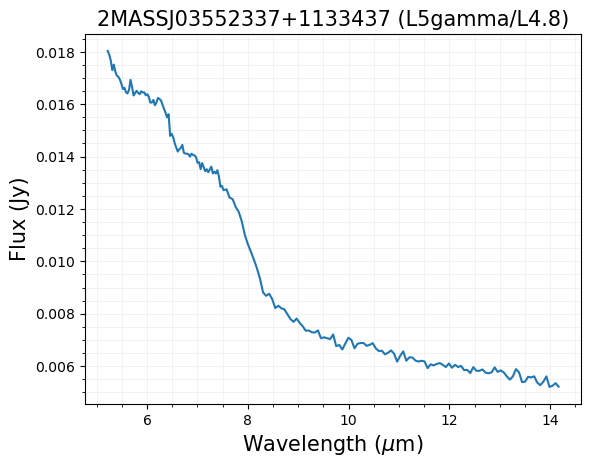

In [7]:
import matplotlib.pyplot as plt

# for the first spectrum
spectrum = spectra[0] 

fig, ax = spectrum.plot()

ax.set_title(f'{spectrum.Name} ({spectrum.SpTypeopt}/{spectrum.SpTypeir})', size=15)

# increase font size of axis labels
ax.set_xlabel(ax.get_xlabel(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)

plt.show()

**Inspect attributes for targets**

All attributes available for each loaded spectrum, shown here for the first spectrum as an example:

In [8]:
spectra[0].keys()

['target',
 'wavelength',
 'flux',
 'eflux',
 'Name',
 'SName',
 'OName',
 'RAJ2000',
 'DEJ2000',
 'Discovery',
 'SpTypeopt',
 'r_SpTypeopt',
 'SpTypeir',
 'r_SpTypeir',
 'spt_adop',
 'spt_flt',
 'Binary',
 'Variable',
 'Non-var',
 'Program',
 'AORKEY',
 'Module',
 'ExpTime',
 'ObsDate',
 'PI',
 'SNR6um',
 'SNR12um',
 'Publication',
 'CH4obs',
 'e_CH4obs',
 'r_CH4obs',
 'W3obs',
 'e_W3obs',
 'CH4syn',
 'e_CH4syn',
 'W3syn',
 'e_W3syn',
 'Water',
 'e_Water',
 'Methane',
 'e_Methane',
 'Ammonia',
 'e_Ammonia',
 'Silicate',
 'e_Silicate',
 'Inclination',
 'ed_Inclination',
 'eu_Inclination',
 'Inc_ref',
 'Jmag',
 'e_Jmag',
 'Hmag',
 'e_Hmag',
 'Kmag',
 'e_Kmag',
 'W1mag',
 'e_W1mag',
 'W2mag',
 'e_W2mag',
 'W3mag',
 'e_W3mag',
 'W4mag',
 'e_W4mag',
 'CH1',
 'eCH1',
 'CH2',
 'eCH2',
 'CH3',
 'eCH3',
 'CH4',
 'eCH4',
 'IRAC_Ref',
 'Period',
 'ePeriod',
 'Period_ref',
 'AJ(%)',
 'e_AJ',
 'A3.6(%)',
 'e_A3.6',
 'A4.5(%)',
 'e_A4.5',
 'ref',
 'parallax',
 'eparallax',
 'parallax_ref',
 'SpeX',

Extract first spectrum 

In [9]:
wl = spectra[0].wavelength # in microns
flux = spectra[0].flux # in Jy
eflux = spectra[0].eflux # in Jy

Print example attributes for loaded spectra

In [10]:
attributes = ['target', 'Name', 'SpTypeopt', 'SpTypeir', 'ObsDate', 'PI', 'SNR6um']

# print selected attributes
for s in spectra:
    print(f'\n{s.target}')
    for attr in attributes:
        print(f'{attr}:', getattr(s, attr))


0355+1133
target: 0355+1133
Name: 2MASSJ03552337+1133437
SpTypeopt: L5gamma
SpTypeir: L4.8
ObsDate: 2008-10-10
PI: Burgasser,AdamJ.
SNR6um: 142

0136+0933
target: 0136+0933
Name: 2MASSJ01365662+0933473
SpTypeopt: T2
SpTypeir: T2.5
ObsDate: 2008-09-01
PI: Mainzer,AmandaK.
SNR6um: 24

2204-5646
target: 2204-5646
Name: 2MASSJ22041052-5646577
SpTypeopt: --
SpTypeir: T6
ObsDate: 2005-05-31
PI: Houck,JamesR.
SNR6um: 75
